# Лабораторная работа 09-11. Линейные модели: Регрессия

In [1]:
from sklearn.datasets import fetch_openml, load_diabetes, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, HuberRegressor, ElasticNetCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
boston = pd.read_csv("HousingData.csv")
boston_drop = boston.dropna()
boston_X = boston_drop.drop("MEDV", axis=1)
boston_y = boston_drop["MEDV"]
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_X = diabetes.data
diabetes_y = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Задание 1: Простая линейная регрессия.
Используйте набор данных "Boston Housing" из sklearn.datasets. Постройте модель линейной регрессии, сделайте предсказания и вычислите MSE (Mean Squared Error).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = 

display(f"MSE: {mean_squared_error(y_test, y_pred)}")

'MSE: 20.78188131007918'

### Задание 2: Использование кросс-валидации.
С использованием того же набора данных проведите k-fold кросс-валидацию (k=10) для своей модели и сравните среднее значения MSE на всех фолдах.

In [42]:
boston_lr_cv = LinearRegression()
boston_cv_scores = cross_val_score(boston_lr_cv, boston_X, boston_y, cv=10, scoring="neg_mean_squared_error")
boston_cv_mse_mean = -boston_cv_scores.mean()

display(f"Коэффициенты кросс-валидации: {-boston_cv_scores}")
display(f"Среднее: {boston_cv_mse_mean}")

'Коэффициенты кросс-валидации: [  7.09334678  13.4503098    8.77177138  27.92870252  27.92676247\n  21.04541013   7.17710912 128.87894669  34.19082567   8.362079  ]'

'Среднее: 28.48252635589523'

### Задание 3: Построение Ridge регрессии.
Примените Ridge регрессию к набору данных "Boston Housing". Подберите гиперпараметр `alpha` через кросс-валидацию.

In [28]:
ridge_alphas = np.logspace(-3, 3, 50)
boston_ridge_cv = RidgeCV(alphas=ridge_alphas)
boston_ridge_cv.fit(boston_X, boston_y)
boston_ridge_best_alpha = boston_ridge_cv.alpha_

display(f"Коэффициенты Ridge: {boston_ridge_cv.coef_}")
display(f"Лучшее альфа: {boston_ridge_best_alpha}")

'Коэффициенты Ridge: [-9.72805115e-02  4.90238044e-02  2.77534460e-02  2.76324883e+00\n -1.73629021e+01  4.28869971e+00 -1.35348417e-02 -1.45013569e+00\n  2.83870883e-01 -1.31657731e-02 -9.08368245e-01  9.69218326e-03\n -4.24077331e-01]'

'Лучшее альфа: 0.03906939937054617'

### Задание 4: Построение Lasso регрессии.
Также примените Lasso регрессию к тем же данным. При подборе гиперпараметра `alpha` через кросс-валидацию сравните количество нулевых весов в модели с результатами Ridge регрессии.

In [27]:
boston_lasso_cv = LassoCV()
boston_lasso_cv.fit(boston_X, boston_y)
boston_lasso_best_alpha = boston_lasso_cv.alpha_

display(f"Коэффициенты Lasso: {boston_lasso_cv.coef_}")
display(f"Лучшее альфа: {boston_lasso_best_alpha}")

'Коэффициенты Lasso: [-6.59930251e-02  5.82481619e-02 -0.00000000e+00  0.00000000e+00\n -0.00000000e+00  1.92333031e+00  1.08337987e-03 -8.20210609e-01\n  2.39690925e-01 -1.55635539e-02 -7.20366987e-01  8.95520670e-03\n -6.15570071e-01]'

'Лучшее альфа: 0.7810919786647427'

### Задание 5: Использование других функций потерь.
Используйте набор данных diabetes из sklearn.datasets и постройте модель HuberRegressor - линейную модель с функцией потерь Хьюбера, которая менее чувствительна к выбросам по сравнению с MSE.

In [34]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y)

diabetes_lr = LinearRegression()
diabetes_lr.fit(diabetes_X_train, diabetes_y_train)
diabetes_lr_pred = diabetes_lr.predict(diabetes_X_test)
diabetes_lr_mse = mean_squared_error(diabetes_y_test, diabetes_lr_pred)

diabetes_huber = HuberRegressor(max_iter=10000)
diabetes_huber.fit(diabetes_X_train, diabetes_y_train)
diabetes_huber_pred = diabetes_huber.predict(diabetes_X_test)
diabetes_huber_mse = mean_squared_error(diabetes_y_test, diabetes_huber_pred)

display(f"LinearRegression: {diabetes_lr_mse}")
display(f"HuberRegressor: {diabetes_huber_mse}")

'LinearRegression: 2931.3230315673945'

'HuberRegressor: 2999.433889618766'

### Задание 6: Исследование эффекта масштабирования признаков.
Используйте любой набор данных с числовыми признаками. Тренируйте модели Ridge и Lasso регрессии на исходных данных и предобработанных данных (используйте стандартизацию и нормализацию). Сравните коэффициенты моделей, полученных для исходных и предобработанных данных.

In [39]:
boston_scaler_std = StandardScaler()
boston_X_std = boston_scaler_std.fit_transform(boston_X)

boston_scaler_mm = MinMaxScaler()
boston_X_mm = boston_scaler_mm.fit_transform(boston_X)

In [40]:
boston_ridge_orig = Ridge()
boston_ridge_orig.fit(boston_X, boston_y)

boston_ridge_std = Ridge()
boston_ridge_std.fit(boston_X_std, boston_y)

boston_ridge_mm = Ridge()
boston_ridge_mm.fit(boston_X_mm, boston_y)

result_ds = pd.DataFrame(columns=['Original', 'StandardScaler', 'MinMaxScaler'])
result_ds['Original'] = boston_ridge_orig.coef_
result_ds['StandardScaler'] = boston_ridge_std.coef_
result_ds['MinMaxScaler'] = boston_ridge_mm.coef_
result_ds

,Original,StandardScaler,MinMaxScaler
0,-0.093324,-0.886348,-6.016660
1,0.050679,1.151741,4.125244
2,-0.006298,0.177096,-0.288073
3,2.638507,0.704303,3.037132
4,-9.493874,-1.992176,-6.601486
5,4.339653,2.992595,19.785807
6,-0.020414,-0.365191,-0.953885
7,-1.341936,-3.020782,-12.612183
8,0.258834,2.379704,4.914933
9,-0.013454,-2.128040,-5.457531


### Задание 7: Изучение влияния регуляризации.
Выберите набор данных с высокой размерностью признаков. Создайте модели Lasso и Ridge регрессии. Проведите эксперименты с различными степенями регуляризации и установите, как они влияют на производительность модели и распределение весов признаков.

In [74]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=10)

alphas = np.logspace(-4, 2, 10)

mse_ridge, mse_lasso= [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    mse_ridge.append(mean_squared_error(y, ridge.predict(X)))

    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X, y)
    mse_lasso.append(mean_squared_error(y, lasso.predict(X)))

display(f"Ridge:{mse_ridge}")
display(f"Lasso:{mse_lasso}")

'Ridge:[89.93446253866082, 89.93446254625948, 89.93446270996665, 89.93446623685956, 89.93454221436477, 89.93617839045493, 89.97135791044086, 90.72225892905728, 106.226459243704, 383.9439157955867]'

'Lasso:[89.93446362463412, 89.93448602318693, 89.93496987567337, 89.94520269419623, 90.14461284111752, 93.28187116486292, 109.2502138977013, 321.22326743438305, 4291.785593138167, 32607.841924271364]'

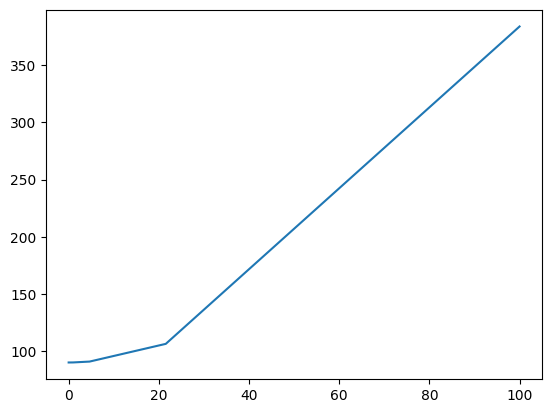

In [75]:
plt.plot(alphas, mse_ridge)
plt.show()

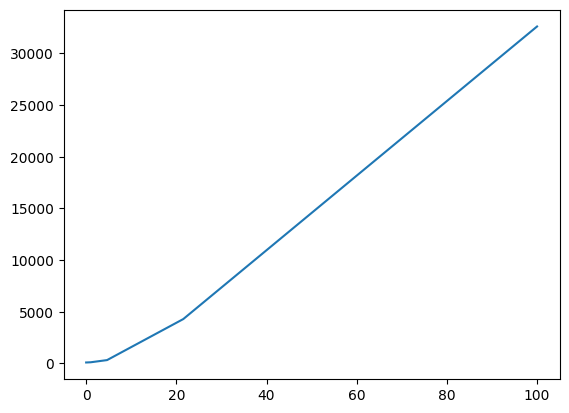

In [76]:
plt.plot(alphas, mse_lasso)
plt.show()


### Задание 8: Регрессия с использованием метода эластичной сети.
На том же наборе данных обучите ElasticNet, который объединяет L1 и L2 регуляризацию. Экспериментируйте с разными соотношениями L1 и L2 регуляризации и установите, как это влияет на производительность модели.

In [69]:
boston_elastic_net = ElasticNetCV(l1_ratio=[0.2, 0.4, 0.8, 1], alphas=np.logspace(-4, 1, 30))
boston_elastic_net.fit(boston_X, boston_y)
display(f"Best alpha: {boston_elastic_net.alpha_}")
display(f"Best l1_ratio: {boston_elastic_net.l1_ratio_}")

'Best alpha: 0.18873918221350977'

'Best l1_ratio: 0.2'

### Задание 9: Комбинирование методов отбора признаков и регуляризации.
Выберите подмножество признаков с помощью любого метода отбора признаков, а затем обучите модели с Lasso и Ridge регуляризацией. Сравнивай модели между собой и с моделью, построенной на всех признаках.

Выбранные признаки:

In [83]:
boston_selector = SelectKBest(f_regression, k=5)
boston_X_selected = boston_selector.fit_transform(boston_X, boston_y)

boston_X_selected_train, boston_X_selected_test, boston_y_selected_train, boston_y_selected_test = train_test_split(boston_X_selected, boston_y)

boston_ridge_sel = Ridge()
boston_ridge_sel.fit(boston_X_selected_train, boston_y_selected_train)
boston_ridge_sel_mse = mean_squared_error(boston_y_selected_test, boston_ridge_sel.predict(boston_X_selected_test))

boston_lasso_sel = Lasso(max_iter=5000)
boston_lasso_sel.fit(boston_X_selected_train, boston_y_selected_train)
boston_lasso_sel_mse = mean_squared_error(boston_y_selected_test, boston_lasso_sel.predict(boston_X_selected_test))

display(f"Ridge: {boston_ridge_sel_mse}")
display(f"Lasso: {boston_lasso_sel_mse}")

'Ridge: 17.262315208328136'

'Lasso: 24.588423249392424'

На всех признаках:

In [84]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y)

boston_ridge_all = Ridge()
boston_ridge_all.fit(boston_X_train, boston_y_train)
boston_ridge_all_mse = mean_squared_error(boston_y_test, boston_ridge_all.predict(boston_X_test))

boston_lasso_all = Lasso(max_iter=5000)
boston_lasso_all.fit(boston_X_train, boston_y_train)
boston_lasso_all_mse = mean_squared_error(boston_y_test, boston_lasso_all.predict(boston_X_test))

display(f"Ridge: {boston_ridge_all_mse}")
display(f"Lasso: {boston_lasso_all_mse}")

'Ridge: 19.50689218963252'

'Lasso: 25.170637131949515'

### Задание 10: Использование метрик, устойчивых к выбросам.
Используйте набор данных diabetes из sklearn. и обучите модель HuberRegressor, которая менее чувствительна к выбросам по сравнению с MSE-метрикой. Сравните эту модель с базовой моделью линейной регрессии.

**Сделано в задании 5**